### Assignmnt 2: Bootstrap and Jacknife

#### Lets compare the bootstrap, normal and jacknife confidence intervals for mean statistic.

In [99]:
bootstrap <- function(data, nboot = 10000, alpha = 0.05){
    n = length(data)
    mean_o = mean(data)
    sd_o = sqrt(var(data))
    
    Tboot_vec = rep(NA, nboot)
    bias_vec = rep(NA, nboot)
    # Bootrstrap loop
    for (i in 1:nboot){
        # resample from the actual data with replacement to get the bootstrap sampling distribution
        x_star <- sample(data, replace=TRUE)
        # calculate mean and sd for the bootstrapped data
        boot.mean = mean(x_star)
        boot.sd = sqrt(var(x_star))
        # Calculate boot vector
        Tboot_vec[i] = (boot.mean - mean_o) / (boot.sd / sqrt(n))
        # calculate the bias vector
        bias_vec[i] = boot.mean - mean_o
        
    }
    # bias in the statistic
    boot.bias = mean(bias_vec)
    
    # Percentile Interval
    percentile = c(quantile(Tboot_vec, alpha/2), quantile(Tboot_vec, 1-alpha/2))
    # Pivotal Interval
    pivotal = c(mean_o - (sd_o/sqrt(n))*percentile[2], mean_o - (sd_o/sqrt(n))*percentile[1])
    # Normal Confidence Interval
    normal = c(mean_o - (sd_o/sqrt(n))*qnorm(1-alpha/2), mean_o + (sd_o/sqrt(n))*qnorm(1-alpha/2))
    
    return(list(confidence.boot=pivotal, confidence.normal = normal, bias = boot.bias))
}

In [116]:
Jackknife <- function(v1,statfunc=sd, alpha=0.05){
    
    n1<-length(v1)
    jackvec<-NULL
    mu0<-statfunc(v1)
    for(i in 1:n1){
        mua<-statfunc(v1[-i])
        jackvec<-c(jackvec, n1*(mu0)-(n1-1)*mua)
    }
    jackbias<-mean(jackvec)-mu0
    jacksd<-sd(jackvec)
    JLB<-mean(jackvec)-(jacksd/sqrt(n1))*qnorm(1-alpha/2)
    JUB<-mean(jackvec)+(jacksd/sqrt(n1))*qnorm(1-alpha/2)

    return(list(mu0=mu0,jackbias=jackbias,jacksd=jacksd, 
       confidence.interval = c(JLB, JUB)))
}

In [103]:
simulator <- function(mu.norm = 3, n = 30, n_sim = 1000){
    # n -> sample size
    
    #coverage vectors for bootstrap and normal confidence interval
    cvec.boot = NULL
    cvec.normal = NULL
    cvec.jack = NULL
    
    # True value of mean
    mu.lnorm = exp(mu.norm + 1/2) 
    print("Actual mean: ")
    print(mu.lnorm)
    # start the simulation
    for(i in 1:n_sim){
        # to know that simulation is running
        if((i/100)==floor(i/100)){
          print(i)
        }
        # Sample from rlognormal distribution
        X <- rlnorm(n, mu.norm)
        # now, let's bootstrap it
        boot_list = bootstrap(X, nboot=10000)
#         print(boot_list)
        # Now, Jacknife it
        jack_list = Jackknife(X, statfunc=mean, alpha = 0.05)
        
#       print(result)
        # bootstrap coverage vector
        cvec.boot = c(cvec.boot, (boot_list$confidence.boot[1] < mu.lnorm)*(boot_list$confidence.boot[2] > mu.lnorm))
        # normal coverage vector
        cvec.normal = c(cvec.normal, (boot_list$confidence.normal[1] < mu.lnorm)*(boot_list$confidence.normal[2] > mu.lnorm))
        # jacknife coverage vector
        cvec.jack = c(cvec.jack, (jack_list$confidence.interval[1]<mu.lnorm)*(jack_list$confidence.interval[2]>mu.lnorm))
    }
    
    return(list(boot.coverage=(sum(cvec.boot)/n_sim),
                norm.coverage=(sum(cvec.normal)/n_sim), 
                jack.coverage=(sum(cvec.jack)/n_sim)))
}

In [104]:
simulator(mu.norm=5, n=10, n_sim=1000)

[1] "Actual mean: "
[1] 244.6919
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.908

$norm.coverage
[1] 0.798

$jack.coverage
[1] 0.798

In [105]:
simulator(mu.norm=5, n=30, n_sim=1000)

[1] "Actual mean: "
[1] 244.6919
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.927

$norm.coverage
[1] 0.867

$jack.coverage
[1] 0.867

In [106]:
simulator(mu.norm=5, n=100, n_sim=1000)

[1] "Actual mean: "
[1] 244.6919
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


$boot.coverage
[1] 0.937

$norm.coverage
[1] 0.922

$jack.coverage
[1] 0.922

### Observations

- The coverage increases as the number of data points we draw go up which is in direct coherence with our intution because the more data we have, all our techniques will give us a better confidence intervals for our statistic leading to better coverage.
- Bootstrap confidence interval is significantly better than the normal and jacknife intervals, as the coverage for bootstrap is consistently high, even with smaller number of datapoints.





#### For the standard deviation of the normal distribution, estimate the bias of the the sample standard deviation when dividing by n, compare the bootstrap and the jacknife(1000 simulations)

In [115]:
# bootstrap implementation for sd/n
bootstrap_sd <- function(data, nboot = 10000){
    n = length(data)
    sd_by_n_o = sd(data) / n
    
    Tboot_vec = rep(NA, nboot)
    bias_vec = rep(NA, nboot)
    # Bootrstrap loop
    for (i in 1:nboot){
        # resample from the actual data with replacement to get the bootstrap sampling distribution
        x_star <- sample(data, replace=TRUE)
        # calculate sd/n which is basically the s
        boot.sd_by_n = sd(x_star) / n
        
        # Calculate boot vector
        Tboot_vec[i] = boot.sd_by_n
        # calculate the bias vector
        bias_vec[i] = boot.sd_by_n - sd_by_n_o
    }
    # bias in the statistic
    return(mean(bias_vec))
}

In [125]:
standard_deviation_by_n <- function(data){
    n = length(data)
    return(sd(data)/n)
}

In [134]:
# Simulation function for part 4
simulator <- function(mu.norm = 5, sd = 2, n = 30, n_sim = 1000){
    # n -> sample size
    
    #coverage vectors for bootstrap and normal confidence interval
    bias_vec.boot = NULL
    bias_vec.jack = NULL

    # True value of sd
    print("True value of sd/n ")
    print(sd/n)
    # start the simulation
    for(i in 1:n_sim){
        # to know that simulation is running
        if((i/100)==floor(i/100)){
          print(i)
        }
        # Sample from rlognormal distribution
        X <- rnorm(n, mean=mu.norm, sd=sd)
        # now, let's get the bootstrap bias
        bias_vec.boot = c(bias_vec.boot, bootstrap_sd(X, nboot=10000))
        # Now, let's get the Jacknife group
        jack_list = Jackknife(X, statfunc=standard_deviation_by_n, alpha = 0.05)
        bias_vec.jack = c(bias_vec.jack, jack_list$jackbias)
    }

    return(list(boot_bias = bias_vec.boot, jack_bias = bias_vec.jack))
}

In [135]:
bias_list = simulator(mu.norm=5, sd=2, n=30, n_sim=1000)

[1] "True value of sd/n "
[1] 0.06666667
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


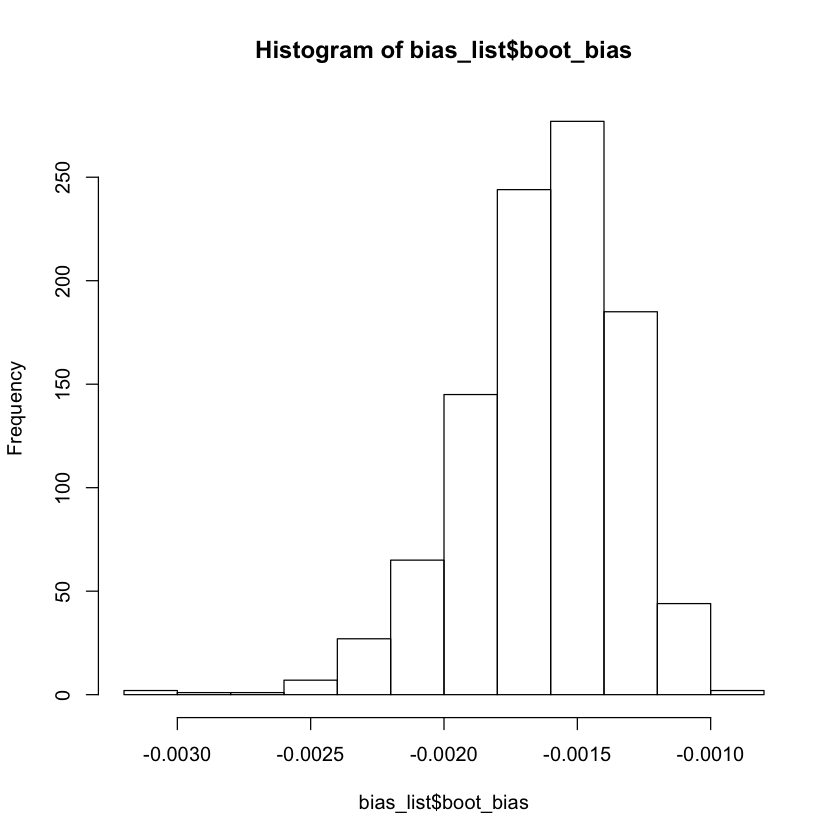

In [137]:
hist(bias_list$boot_bias)

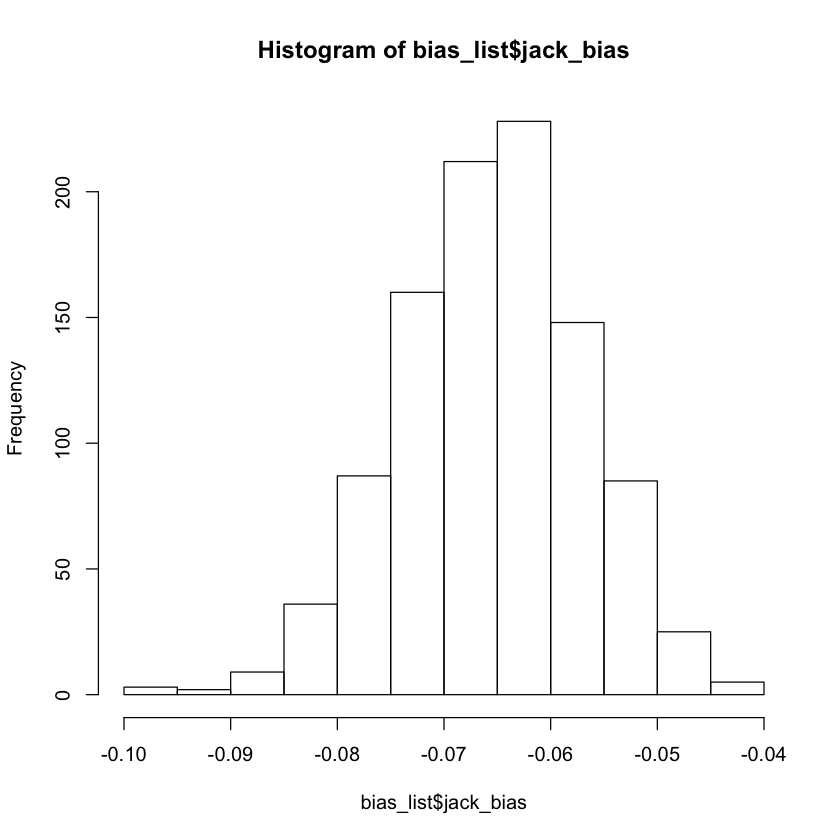

In [138]:
hist(bias_list$jack_bias)

### Observations
- Jacknife has much larger absolute values of bias as compared to bootstrap bias
- Bias from both jacknife and bootstrap is approximately normally distributed